In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


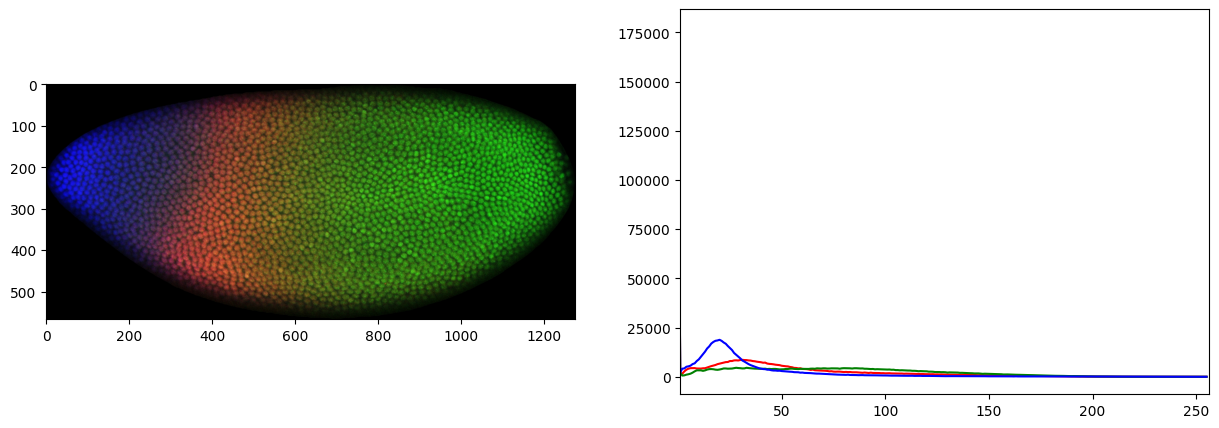

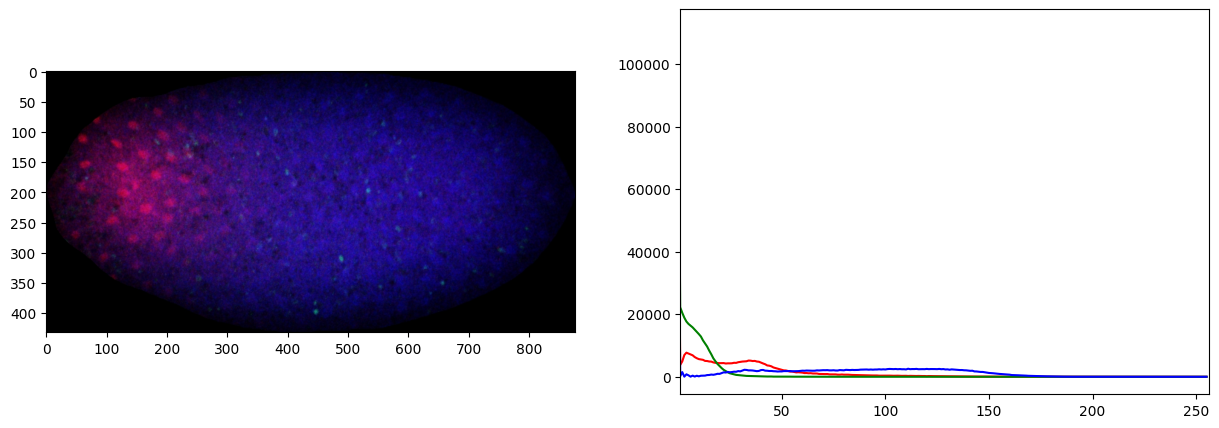

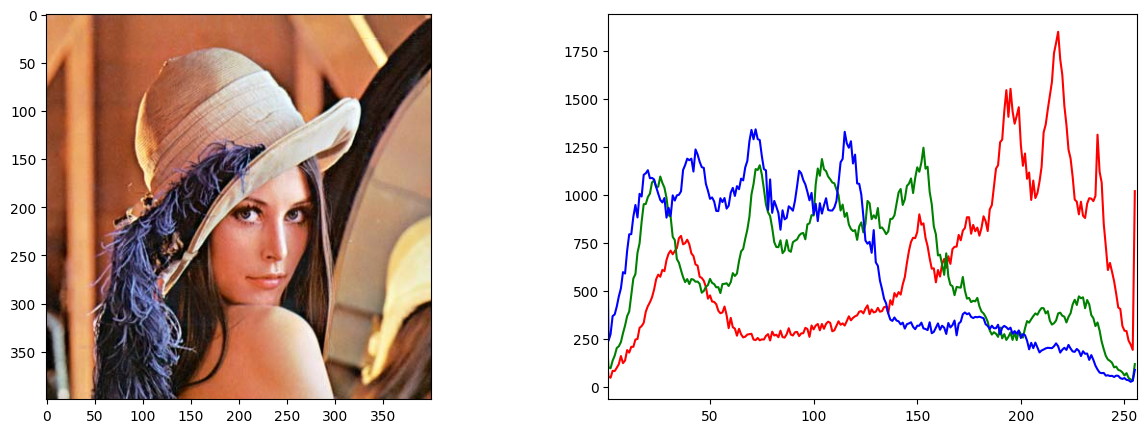

In [17]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img1RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
img3RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

color = ('r','g','b')

figura1 = plt.figure(figsize = (15,5))
figura1.add_subplot(1,2,1)
plt.imshow(img1RGB)
figura1.add_subplot(1,2,2)
for i,col in enumerate(color):
    hist1 = cv2.calcHist([img1RGB],[i],None,[256],[0,256])
    plt.plot(hist1,color = col)
    plt.xlim([1,256])
plt.show()

figura2 = plt.figure(figsize = (15,5))
figura2.add_subplot(1,2,1)
plt.imshow(img2RGB)
figura2.add_subplot(1,2,2)
for i,col in enumerate(color):
    histr2 = cv2.calcHist([img2RGB],[i],None,[256],[0,256])
    plt.plot(histr2,color = col)
    plt.xlim([1,256])
plt.show()

figura3 = plt.figure(figsize = (15,5))
figura3.add_subplot(1,2,1)
plt.imshow(img3RGB)
figura3.add_subplot(1,2,2)
for i,col in enumerate(color):
    histr3 = cv2.calcHist([img3RGB],[i],None,[256],[0,256])
    plt.plot(histr3,color = col)
    plt.xlim([1,256])
plt.show()


2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

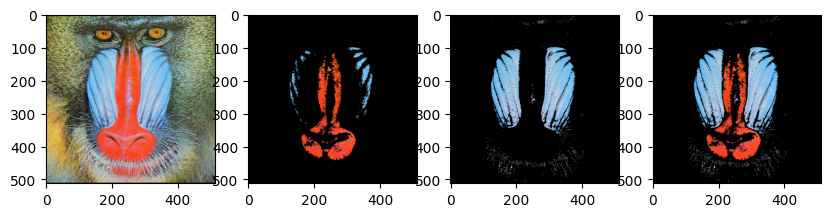

In [81]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_rgb = cv2.cvtColor(img_mand,cv2.COLOR_BGR2RGB)
img_mand_hsv = cv2.cvtColor(img_mand,cv2.COLOR_BGR2HSV)

lowRed = np.array([0, 0, 240])
highRed = np.array([190, 255, 255])
maskRed = cv2.inRange(img_mand_hsv, lowRed, highRed)
red = cv2.bitwise_and(img_mand_hsv, img_mand_hsv, mask=maskRed)
red = cv2.cvtColor(red,cv2.COLOR_HSV2RGB)

lowBlue = np.array([100, 0, 200])
highBlue = np.array([150, 200, 255])
maskBlue = cv2.inRange(img_mand_hsv, lowBlue, highBlue)
blue = cv2.bitwise_and(img_mand_hsv, img_mand_hsv, mask=maskBlue)
blue = cv2.cvtColor(blue,cv2.COLOR_HSV2RGB)

finalMask = maskBlue+maskRed
final = cv2.bitwise_and(img_mand_hsv, img_mand_hsv, mask=finalMask)
final = cv2.cvtColor(final,cv2.COLOR_HSV2RGB)

figura = plt.figure(figsize = (10,5))

figura.add_subplot(1,4,1)
plt.imshow(img_mand_rgb)
figura.add_subplot(1,4,2)
plt.imshow(red)
figura.add_subplot(1,4,3)
plt.imshow(blue)
figura.add_subplot(1,4,4)
plt.imshow(final)



3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

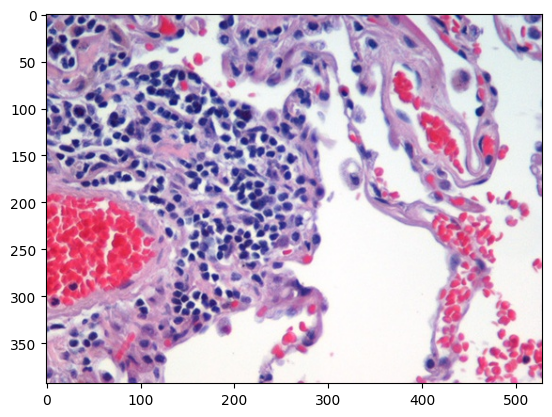

In [15]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
plt.imshow(img_he_RGB)
